# Proyecto: Multiclasificación de Deportes

### Problema a Resolver: ¿Podemos clasificar correctamente imágenes de deportes pero con poco material para trabajar?

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import random
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
Path = "../Práctica 3/" #Depende de la ruta en tu máquina

In [5]:
os.makedirs(Path+"deportes", exist_ok=True)

In [6]:
with zipfile.ZipFile('deportes.zip', 'r') as archive:
   # Extrae todo el contenido del achivo ZIP en el directorio actual
   archive.extractall("deportes")

In [7]:
os.listdir("deportes")

['class_dict.csv',
 'deportes',
 'EfficientNetB3-sports-0.97.h5',
 'images to predict',
 'sports.csv',
 'test',
 'train',
 'valid']

In [8]:
#Normalizan los valores entre 0 y 1
train = ImageDataGenerator(rescale=1./255)
valid = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

In [9]:
train_dir = "deportes/train"
valid_dir = "deportes/valid"
test_dir = "deportes/test"

train_dataset = train.flow_from_directory(train_dir, 
                                  target_size = (224, 224), 
                                  color_mode = 'rgb',
                                  batch_size = 50,
                                  class_mode = 'categorical',
                                  shuffle=False)

valid_dataset = valid.flow_from_directory(valid_dir, 
                                  target_size = (224, 224), 
                                  color_mode = 'rgb',
                                  batch_size = 50,
                                  class_mode = 'categorical',
                                  shuffle=False)

test_dataset = test.flow_from_directory(test_dir, 
                                target_size = (224, 224), 
                                color_mode = 'rgb', 
                                batch_size = 50,
                                class_mode= 'categorical',
                                shuffle=False)

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [10]:
test_dataset.class_indices

{'air hockey': 0,
 'ampute football': 1,
 'archery': 2,
 'arm wrestling': 3,
 'axe throwing': 4,
 'balance beam': 5,
 'barell racing': 6,
 'baseball': 7,
 'basketball': 8,
 'baton twirling': 9,
 'bike polo': 10,
 'billiards': 11,
 'bmx': 12,
 'bobsled': 13,
 'bowling': 14,
 'boxing': 15,
 'bull riding': 16,
 'bungee jumping': 17,
 'canoe slamon': 18,
 'cheerleading': 19,
 'chuckwagon racing': 20,
 'cricket': 21,
 'croquet': 22,
 'curling': 23,
 'disc golf': 24,
 'fencing': 25,
 'field hockey': 26,
 'figure skating men': 27,
 'figure skating pairs': 28,
 'figure skating women': 29,
 'fly fishing': 30,
 'football': 31,
 'formula 1 racing': 32,
 'frisbee': 33,
 'gaga': 34,
 'giant slalom': 35,
 'golf': 36,
 'hammer throw': 37,
 'hang gliding': 38,
 'harness racing': 39,
 'high jump': 40,
 'hockey': 41,
 'horse jumping': 42,
 'horse racing': 43,
 'horseshoe pitching': 44,
 'hurdles': 45,
 'hydroplane racing': 46,
 'ice climbing': 47,
 'ice yachting': 48,
 'jai alai': 49,
 'javelin': 50,
 '

Sample_Image_size(H*W): (224, 224, 3)


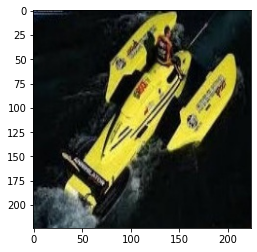

In [11]:
sample = plt.imread(Path+"deportes/train/hydroplane racing/039.jpg")
samp = sample.shape
plt.imshow(sample)
print('Sample_Image_size(H*W):', samp)

In [12]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation='relu'),
    
    keras.layers.Dense(100, activation = 'softmax')
])


In [13]:
# setting hyperparameters
model1.compile(optimizer='adam', # set the optimizer
               loss='categorical_crossentropy', # loss function
               metrics=['accuracy']) #accuracy metric

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [15]:
history = model1.fit(
            train_dataset,
            epochs=10, 
            validation_data=valid_dataset,
            verbose=2
            )

Epoch 1/10
272/272 - 74s - loss: 4.6301 - accuracy: 0.0037 - val_loss: 4.6059 - val_accuracy: 0.0100 - 74s/epoch - 273ms/step
Epoch 2/10
272/272 - 66s - loss: 4.6087 - accuracy: 0.0054 - val_loss: 4.6059 - val_accuracy: 0.0100 - 66s/epoch - 244ms/step
Epoch 3/10
272/272 - 67s - loss: 4.6082 - accuracy: 0.0066 - val_loss: 4.6059 - val_accuracy: 0.0100 - 67s/epoch - 247ms/step
Epoch 4/10
272/272 - 68s - loss: 4.6074 - accuracy: 0.0141 - val_loss: 4.6059 - val_accuracy: 0.0100 - 68s/epoch - 249ms/step
Epoch 5/10
272/272 - 68s - loss: 4.6067 - accuracy: 0.0141 - val_loss: 4.6060 - val_accuracy: 0.0100 - 68s/epoch - 250ms/step
Epoch 6/10
272/272 - 68s - loss: 4.6064 - accuracy: 0.0141 - val_loss: 4.6060 - val_accuracy: 0.0100 - 68s/epoch - 251ms/step
Epoch 7/10
272/272 - 68s - loss: 4.6058 - accuracy: 0.0141 - val_loss: 4.6061 - val_accuracy: 0.0100 - 68s/epoch - 251ms/step
Epoch 8/10
272/272 - 68s - loss: 4.6050 - accuracy: 0.0141 - val_loss: 4.6062 - val_accuracy: 0.0100 - 68s/epoch - 251

In [16]:

print("PERFOMANCE",model1.evaluate(test_dataset))


10/10 [==============================] - 1s 98ms/step - loss: 4.6064 - accuracy: 0.0100
PERFOMANCE [4.606449604034424, 0.009999999776482582]


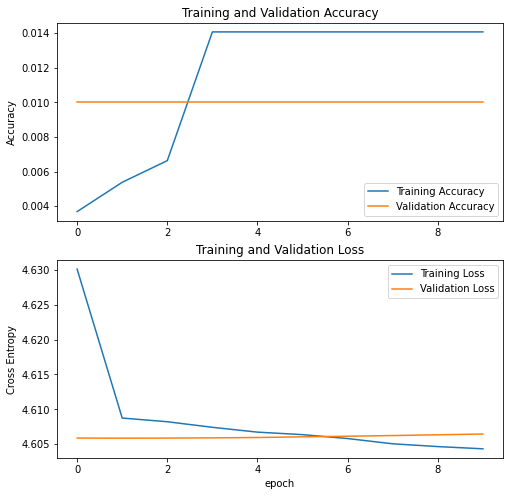

In [17]:
# get the metrics from history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [18]:
train_dataset_augmented = ImageDataGenerator(rescale = 1./255.,
                                             rotation_range = 40, 
                                             width_shift_range = 0.2, 
                                             height_shift_range = 0.2, 
                                             shear_range = 0.2, 
                                             zoom_range = 0.2, 
                                             horizontal_flip = True, 
                                             vertical_flip =True
                                            )

In [19]:
train_dataset_augmented = train_dataset_augmented.flow_from_directory(train_dir, 
                                                    target_size = (224, 224), 
                                                    color_mode = 'rgb',
                                                    batch_size = 50,
                                                    class_mode = 'categorical'
                                                   )

Found 13572 images belonging to 100 classes.


In [20]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation='relu'),
    
    keras.layers.Dense(100, activation = 'softmax')
])

In [21]:
# setting hyperparameters
model2.compile(optimizer='adam', # set the optimizer
               loss='categorical_crossentropy', # loss function
               metrics=['accuracy']) #accuracy metric

In [22]:
history2 = model2.fit(
            train_dataset_augmented,
            epochs=10, 
            validation_data=valid_dataset,
            verbose=2
            )

Epoch 1/10
272/272 - 163s - loss: 4.5805 - accuracy: 0.0133 - val_loss: 4.5337 - val_accuracy: 0.0240 - 163s/epoch - 600ms/step
Epoch 2/10
272/272 - 167s - loss: 4.2739 - accuracy: 0.0432 - val_loss: 3.9957 - val_accuracy: 0.0820 - 167s/epoch - 615ms/step
Epoch 3/10
272/272 - 169s - loss: 3.8144 - accuracy: 0.0960 - val_loss: 3.4438 - val_accuracy: 0.1260 - 169s/epoch - 620ms/step
Epoch 4/10
272/272 - 168s - loss: 3.4759 - accuracy: 0.1485 - val_loss: 3.1622 - val_accuracy: 0.1980 - 168s/epoch - 619ms/step
Epoch 5/10
272/272 - 178s - loss: 3.2020 - accuracy: 0.1982 - val_loss: 3.1162 - val_accuracy: 0.2260 - 178s/epoch - 655ms/step
Epoch 6/10
272/272 - 182s - loss: 3.0064 - accuracy: 0.2398 - val_loss: 2.8211 - val_accuracy: 0.2600 - 182s/epoch - 668ms/step
Epoch 7/10
272/272 - 173s - loss: 2.8535 - accuracy: 0.2720 - val_loss: 2.4651 - val_accuracy: 0.3480 - 173s/epoch - 635ms/step
Epoch 8/10
272/272 - 169s - loss: 2.7168 - accuracy: 0.2986 - val_loss: 2.6835 - val_accuracy: 0.3060 - 

In [23]:

print("PERFOMANCE",model2.evaluate(test_dataset))


10/10 [==============================] - 1s 98ms/step - loss: 2.2371 - accuracy: 0.4060
PERFOMANCE [2.2371320724487305, 0.4059999883174896]


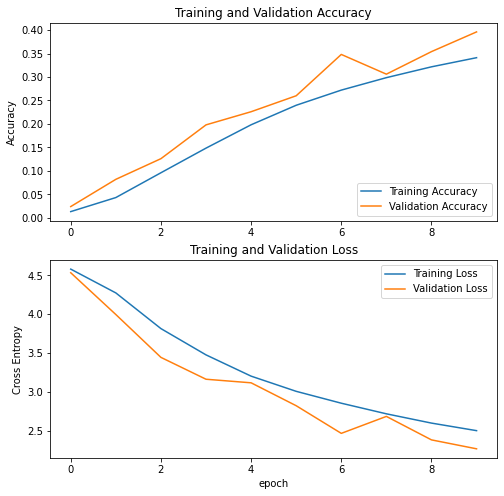

In [24]:
# get the metrics from history

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
import efficientnet.tfkeras as efn

In [26]:
base_model =  efn.EfficientNetB0(input_shape = (224, 224, 3), # Shape of our images
                                 include_top = False, # Leave out the last fully connected layer
                                 weights = 'imagenet')

In [27]:
for layer in base_model.layers:
    layer.trainable = False
    
base_model.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                   

In [31]:
model3 = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100, activation = 'softmax')
])

In [32]:
# setting hyperparameters
model3.compile(optimizer='adam', # set the optimizer
               loss='categorical_crossentropy', # loss function
               metrics=['accuracy']) #accuracy metric

In [34]:
history3 = model3.fit(
            train_dataset_augmented,
            epochs=10, 
            validation_data=valid_dataset,
            verbose=2
            )

Epoch 1/10
272/272 - 168s - loss: 1.3204 - accuracy: 0.6298 - val_loss: 0.6068 - val_accuracy: 0.8220 - 168s/epoch - 618ms/step
Epoch 2/10
272/272 - 165s - loss: 1.1718 - accuracy: 0.6642 - val_loss: 0.5244 - val_accuracy: 0.8340 - 165s/epoch - 608ms/step
Epoch 3/10
272/272 - 168s - loss: 1.0824 - accuracy: 0.6890 - val_loss: 0.5610 - val_accuracy: 0.8420 - 168s/epoch - 617ms/step
Epoch 4/10
272/272 - 169s - loss: 0.9994 - accuracy: 0.7108 - val_loss: 0.5115 - val_accuracy: 0.8340 - 169s/epoch - 622ms/step
Epoch 5/10
272/272 - 163s - loss: 0.9424 - accuracy: 0.7300 - val_loss: 0.4131 - val_accuracy: 0.8760 - 163s/epoch - 599ms/step
Epoch 6/10
272/272 - 168s - loss: 0.8950 - accuracy: 0.7367 - val_loss: 0.4332 - val_accuracy: 0.8580 - 168s/epoch - 619ms/step
Epoch 7/10
272/272 - 168s - loss: 0.8645 - accuracy: 0.7459 - val_loss: 0.4448 - val_accuracy: 0.8680 - 168s/epoch - 616ms/step
Epoch 8/10
272/272 - 166s - loss: 0.8210 - accuracy: 0.7580 - val_loss: 0.4274 - val_accuracy: 0.8800 - 

In [35]:

print("PERFOMANCE",model3.evaluate(test_dataset))


10/10 [==============================] - 2s 218ms/step - loss: 0.3867 - accuracy: 0.8840
PERFOMANCE [0.38665682077407837, 0.8840000033378601]


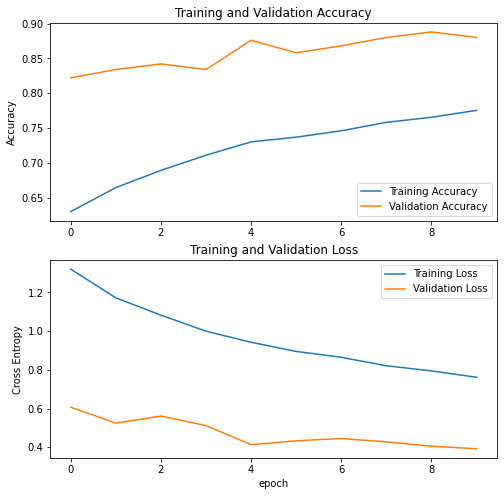

In [36]:
# get the metrics from history

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [37]:
#Hacer comentarios para 

In [38]:
results = model3.evaluate(test_dataset, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.38666
Test Accuracy: 88.40%


In [39]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [40]:
y_true = test_dataset.classes
y_pred = np.argmax(model3.predict(test_dataset), axis = 1)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)
print(classification_report(y_true, y_pred, target_names=test_dataset.class_indices.keys()))

10/10 [==============================] - 3s 235ms/step
F1 Score: 0.8766594516594516
                       precision    recall  f1-score   support

           air hockey       1.00      0.60      0.75         5
      ampute football       1.00      1.00      1.00         5
              archery       1.00      1.00      1.00         5
        arm wrestling       1.00      1.00      1.00         5
         axe throwing       1.00      1.00      1.00         5
         balance beam       1.00      1.00      1.00         5
        barell racing       1.00      0.80      0.89         5
             baseball       0.75      0.60      0.67         5
           basketball       0.83      1.00      0.91         5
       baton twirling       1.00      0.80      0.89         5
            bike polo       0.56      1.00      0.71         5
            billiards       0.71      1.00      0.83         5
                  bmx       0.00      0.00      0.00         5
              bobsled       1.00 

In [41]:
classes = dict(zip(test_dataset.class_indices.values(), test_dataset.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index" : list(range(len(test_dataset.labels))), 
                            "Test Labels" : test_dataset.labels, 
                            "Test Classes" : [classes[i] for i in test_dataset.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": test_dataset.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model3.predict(test_dataset), axis = 1))]
                           })
Predictions.head(8)

10/10 [==============================] - 2s 226ms/step


,Image Index,Test Labels,Test Classes,Prediction Labels,Prediction Classes,Path,Prediction Probability
0,0,0,air hockey,0,air hockey,air hockey\1.jpg,0.964227
1,1,0,air hockey,86,table tennis,air hockey\2.jpg,0.854314
2,2,0,air hockey,0,air hockey,air hockey\3.jpg,0.510868
3,3,0,air hockey,11,billiards,air hockey\4.jpg,0.983025
4,4,0,air hockey,0,air hockey,air hockey\5.jpg,0.729177
5,5,1,ampute football,1,ampute football,ampute football\1.jpg,0.996712
6,6,1,ampute football,1,ampute football,ampute football\2.jpg,0.995570
7,7,1,ampute football,1,ampute football,ampute football\3.jpg,0.527842


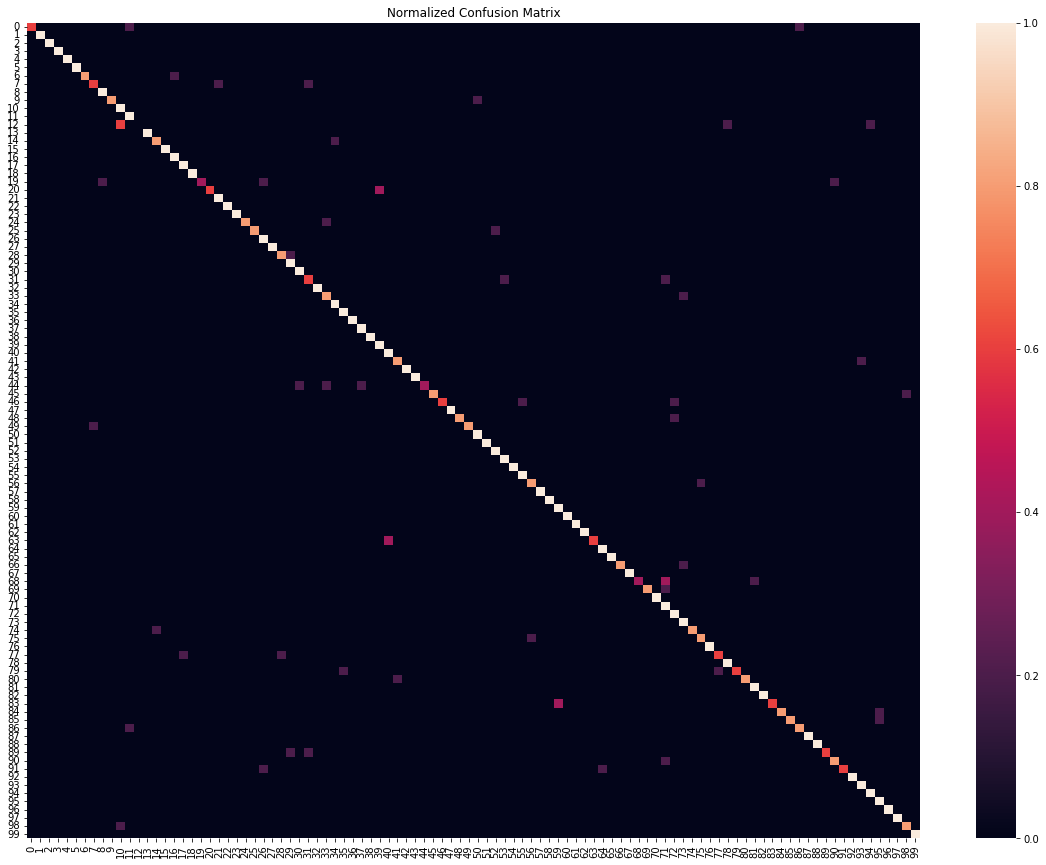

In [42]:
preds = model3.predict_generator(test_dataset)
y_pred = np.argmax(preds, axis=1)
g_dict = test_dataset.class_indices
classes = list(g_dict.keys())

cf_matrix = confusion_matrix(test_dataset.classes, y_pred, normalize='true')
plt.figure(figsize = (20,15))
sns.heatmap(cf_matrix, annot=False, xticklabels = sorted(set(test_dataset.classes)), yticklabels = sorted(set(test_dataset.classes)))
plt.title('Normalized Confusion Matrix')
plt.show()